# Mutual Information (MI)

Mutual Information measures the **amount of information gained** about one variable by observing another.

Formally:

$
I(X; Y) = \sum_{x \in X} \sum_{y \in Y} P(x, y) \log_2 \left( \frac{P(x, y)}{P(x)P(y)} \right)
$

- MI = 0 if X and Y are independent (knowing X gives no info about Y)
- MI > 0 if there is some dependency between X and Y

**Applications:**
- Feature selection
- Decision tree splits
- Information bottleneck in deep learning


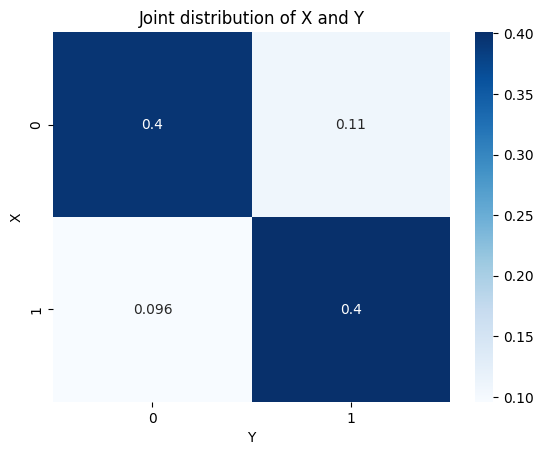

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.random.binomial(1, 0.5, size=1000)
Y = (X ^ np.random.binomial(1, 0.2, size=1000))

df = pd.DataFrame({'X': X, 'Y': Y})
sns.heatmap(pd.crosstab(df['X'], df['Y'], normalize='all'), annot=True, cmap='Blues')
plt.title("Joint distribution of X and Y")
plt.show()

In [9]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X.reshape(-1,1), Y, discrete_features=True)
print(f"MI of X and Y is {mi[0]:.4f}")

MI of X and Y is 0.1874


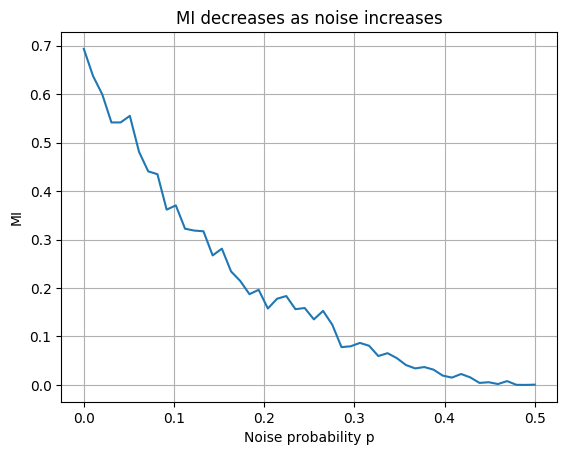

In [10]:
mis = []
ps = np.linspace(0,0.5,50)

for p in ps:
    Y_noisy = X ^ np.random.binomial(1,p, size=1000)
    mi_p = mutual_info_classif(X.reshape(-1,1), Y_noisy, discrete_features=True)
    mis.append(mi_p[0])

plt.plot(ps, mis)
plt.xlabel("Noise probability p")
plt.ylabel("MI")
plt.title("MI decreases as noise increases")
plt.grid(True)
plt.show()

## Summary

- MI quantifies **how much one variable tells you about another**.
- Higher MI = stronger relationship between features and targets.
- Used in:
  - **Feature selection** (e.g., `SelectKBest`)
  - **Tree splitting**
  - **Clustering similarity**
- Unlike correlation, MI works with **nonlinear** and **categorical** data.
